10.01.2021

### Image Processing in Physics
#### Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss

# Exercise 1: Fraunhofer propagation

## Part 1: Atmospheric phase

Generate a "speckle pattern" from an atmospheric phase screen using Fraunhofer propagation.

We would like to model the setup shown below:

![title](geometry_fraunhofer.png)

Atmospheric disturbances introduce random phase variations to (initially undisturbed) wavefronts.
These are then detected in an optical instrument consisting of an aperture and a converging lens.
We would like to simulate the resultant image in the focal plane of the lens.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

Define relevant parameters:

In [3]:
N = 1024      # Square dimension of phase screen
radius = 128  # Radius of the circular aperture in pixels

Generate an NxN array of zeros for the aperture:

In [4]:
aperture = np.zeros((N, N))

Fill `aperture` with the transmission function of a circular aperture of radius `radius`:

Transmission should be `1` within the aperture, and `0` outside.

Functions of interest include: `np.meshgrid`, `np.linspace`, `np.arange` ...

Hint: In cartesian coordinates $(x,y)$, a circle of radius $r$
centered around the origin $(x_0, y_0)$ is given by: $(x-x_0)^2 + (y-y_0)^2 = r^2$.

<IPython.core.display.Javascript object>


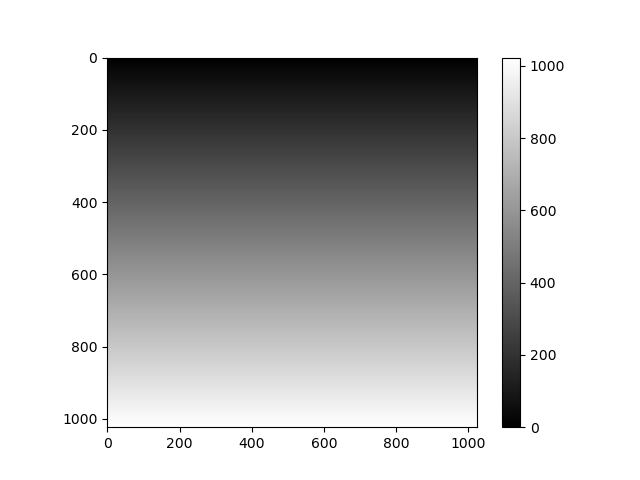

In [7]:
sh = aperture.shape
x = np.arange(sh[0])
y = np.arange(sh[1])
yy, xx = np.meshgrid(x, y)

plt.figure()
plt.imshow(xx)
plt.colorbar()
cx, cy = (sh[0] - 1) / 2., (sh[1] - 1) / 2.
r = np.sqrt((xx - cx)**2 + (yy - cy)**2)
aperture = (r < radius)

Plot your aperture function:

<IPython.core.display.Javascript object>


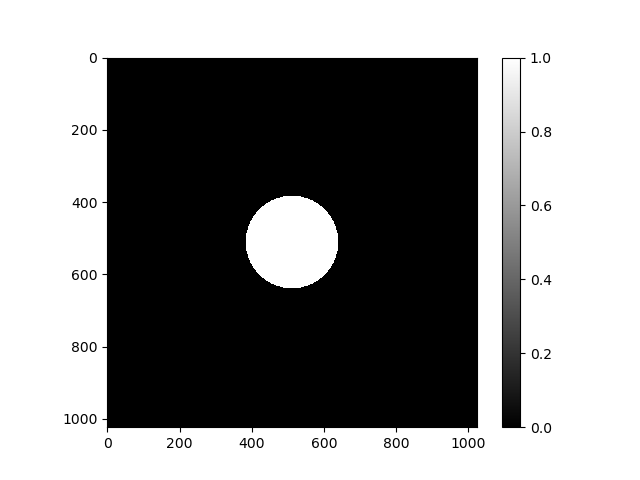

In [23]:
plt.figure()
plt.imshow(aperture)
plt.colorbar()

Load in the wavefront phase screen and plot it:

<IPython.core.display.Javascript object>


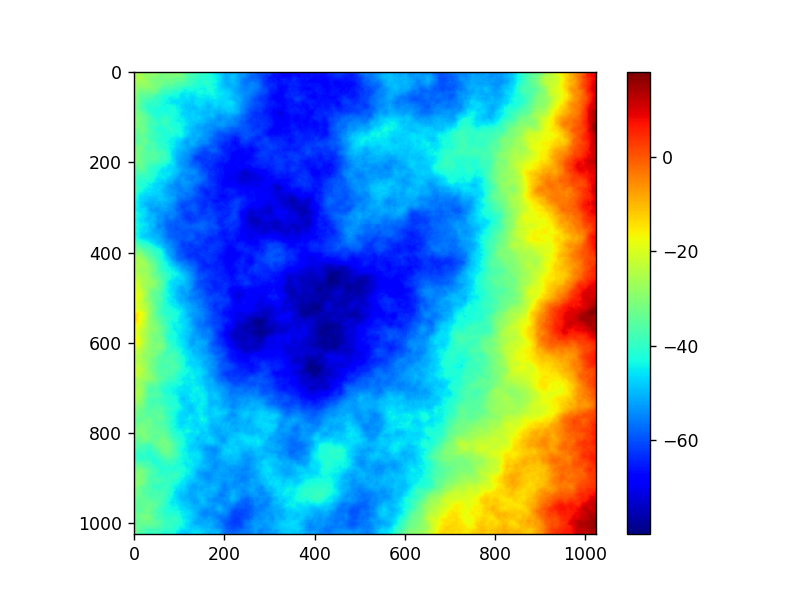

In [6]:
screen = np.loadtxt('wavefront.txt')

plt.figure()
plt.imshow(screen, cmap='jet')
plt.colorbar()

Propagate the phase screen from the aperture to the focal plane using Fraunhofer propagation.

Hints:

* `aperture` is the magnitude, and `screen` is the phase.
* Fraunhofer propagation: Wave at focal plane is FT of wave at aperture plane
* You may need to use an `np.fft.fftshift` here!
* Intensity is the absolute value squared of field at the focal plane squared

In [8]:
field = aperture * np.exp(1.j * screen) 
field_prop = np.fft.fftshift(np.fft.fft2(field))
speckle = np.abs(field_prop)**2

Show the far-field propagation image.
Near the center of the image, speckle patterns should be visible.

Crop the center of the image to see more details!

<IPython.core.display.Javascript object>


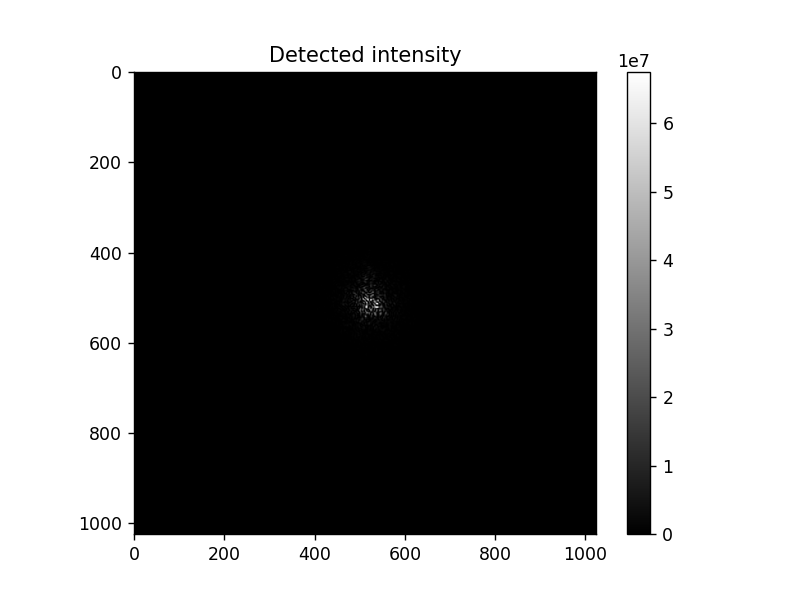

In [9]:
plt.figure()
plt.title('Detected intensity')
plt.imshow(speckle)
plt.colorbar()

## Part 2: Tilted Wavefront

We perform Fraunhofer propagation on a wave which is travelling not directly to the detector, but is angled a bit to the bottom $\Rightarrow$ the wave vector is pointed towards the lower half of the detector. 

The magnitude of the wave field is $1$ everywhere. The phase encodes the direction of the wave. The wave vector is tilted, and orthogonal to the wavefront. We encode that tilt by a **vertical linear ramp in the phase**.

**Intuitively**, what intensity pattern do you expect? First, think of the pattern of the aperture alone (round aperture in lecture). It is then shifted according to the direction of the wave vector. How is this connected to the linear ramp and the Fourier transformation of Fraunhofer propagation?

Hint: You can look at some [Fourier transform relationships](https://en.wikipedia.org/wiki/Fourier_transform#Functional_relationships,_one-dimensional) and look for a "shift" ;-)

Define the tilted wavefront. Use the aperture for magnitude and phase for direction. Use a vertical ramp from $[0, N]$ in the phase.

In [21]:
ramp = np.linspace(0, 1, N)[:, None] * N
field = aperture * np.exp(1j * ramp)
field_prop = np.fft.fftshift(np.fft.fft2(field))
intensity = np.abs(field_prop)**2



Visualize the propagated wave. Zoom in to see the characteristic pattern of the aperture!

<IPython.core.display.Javascript object>


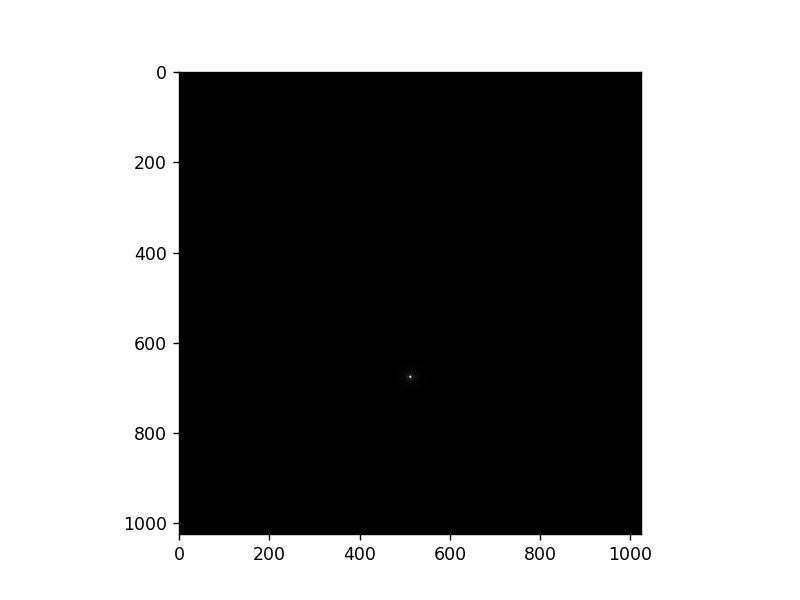

In [12]:
plt.figure()
plt.imshow(np.sqrt(intensity))